In [37]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
from fastai.imports import *
from fastai.tabular.core import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display
import seaborn as sns


from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV


In [3]:
PATH = '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/fastai/data/Boston Housing Dataset/'

In [39]:
df_raw_train = pd.read_csv(f'{PATH}projectdata.csv',low_memory = False)
df_raw_test = pd.read_csv(f'{PATH}test.csv',low_memory = False)

In [40]:
def display_all(df):
    with pd.option_context("display.max_rows",1000):
        with pd.option_context("display.max_columns",1000):
            display(df)

In [41]:
display_all(df_raw_train)

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1,7.52601,0.0,18.10,0,0.7130,6.417,98.3,2.1850,24,666,20.2,304.21,19.31,13.0
1,2,0.01360,75.0,4.00,0,0.4100,5.888,47.6,7.3197,3,469,21.1,396.90,14.80,18.9
2,3,0.05789,12.5,6.07,0,0.4090,5.878,21.4,6.4980,4,345,18.9,396.21,8.10,22.0
3,4,0.05646,0.0,12.83,0,0.4370,6.232,53.7,5.0141,5,398,18.7,386.40,12.34,21.2
4,5,2.14918,0.0,19.58,0,0.8710,5.709,98.5,1.6232,5,403,14.7,261.95,15.79,19.4
5,6,0.22876,0.0,8.56,0,0.5200,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
6,7,0.00906,90.0,2.97,0,0.4000,7.088,20.8,7.3073,1,285,15.3,394.72,7.85,32.2
7,8,0.03961,0.0,5.19,0,0.5150,6.037,34.5,5.9853,5,224,20.2,396.90,8.01,21.1
8,9,0.53412,20.0,3.97,0,0.6470,7.520,89.4,2.1398,5,264,13.0,388.37,7.26,43.1
9,10,0.08873,21.0,5.64,0,0.4390,5.963,45.7,6.8147,4,243,16.8,395.56,13.45,19.7


In [17]:
df_raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       406 non-null    int64  
 1   CRIM     406 non-null    float64
 2   ZN       406 non-null    float64
 3   INDUS    406 non-null    float64
 4   CHAS     406 non-null    int64  
 5   NOX      406 non-null    float64
 6   RM       406 non-null    float64
 7   AGE      406 non-null    float64
 8   DIS      406 non-null    float64
 9   RAD      406 non-null    int64  
 10  TAX      406 non-null    int64  
 11  PTRATIO  406 non-null    float64
 12  B        406 non-null    float64
 13  LSTAT    406 non-null    float64
 14  MEDV     406 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 47.7 KB


/var/folders/4m/chrcn1cs1xx5p66fgrvlxk1c0000gn/T/ipykernel_24951/3162536764.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw_train['MEDV'],bins=30)


<Axes: xlabel='MEDV', ylabel='Density'>

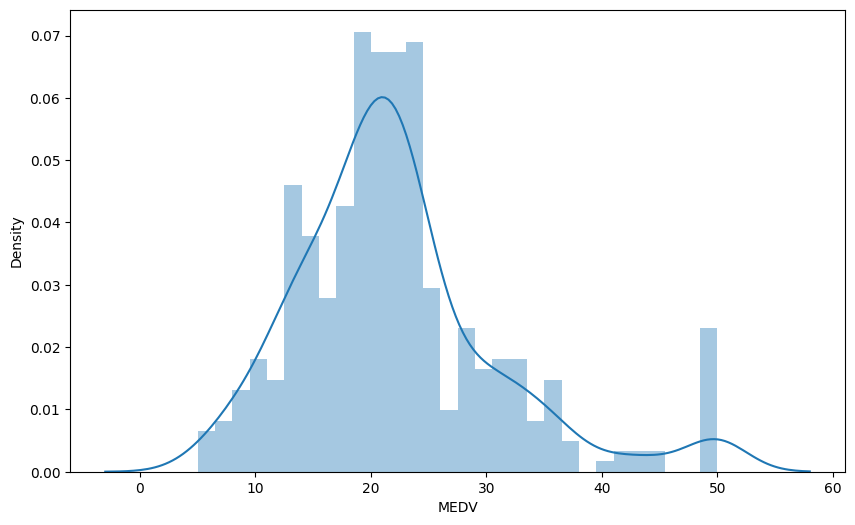

In [7]:
plt.figure(figsize=(10, 6))
sns.distplot(df_raw_train['MEDV'],bins=30)

<Axes: >

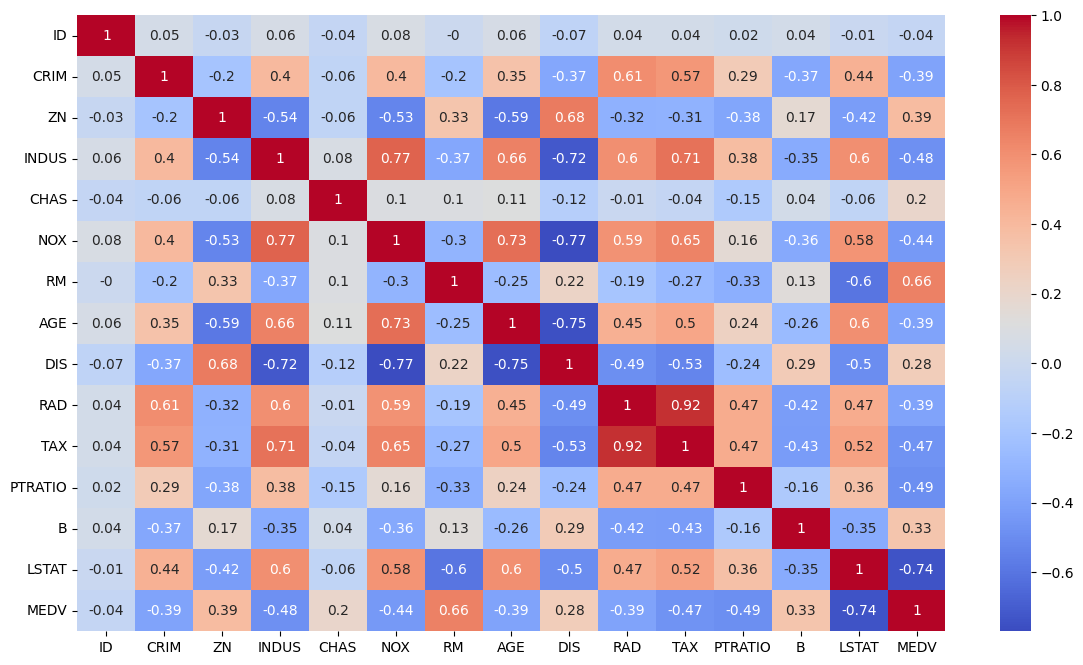

In [8]:
plt.figure(figsize=(14, 8))
corr_matrix = df_raw_train.corr().round(2)
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=True)

Text(0, 0.5, 'MEDV')

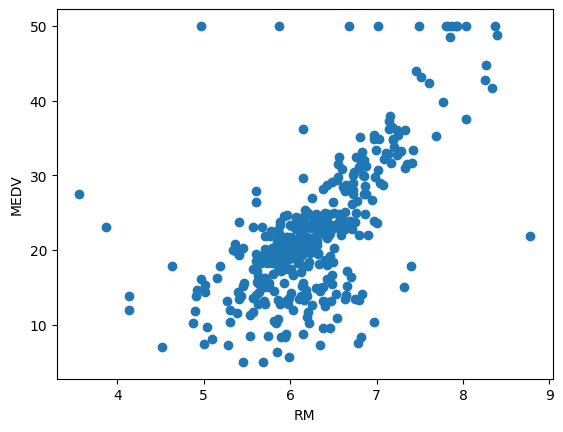

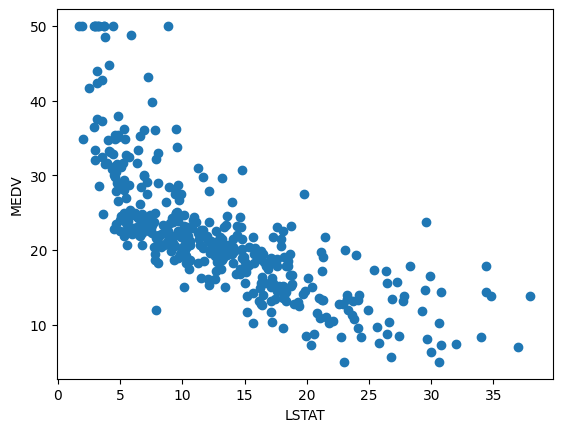

In [9]:
target_var = df_raw_train['MEDV']

plot1 = plt.figure(1)
plt.scatter(df_raw_train['RM'],target_var)
plt.xlabel('RM')
plt.ylabel('MEDV')

plot2 = plt.figure(2)
plt.scatter(df_raw_train['LSTAT'],target_var)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

In [10]:
def split_vals(a,n):
    return a[:n],a[n:]

In [11]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res =[rmse(m.predict(X_train),y_train),rmse(m.predict(X_valid),y_valid),m.score(X_train,y_train),m.score(X_valid,y_valid)]
    if hasattr(m,'oob_score_'):res.append(m.oob_score_)
    print(res)

In [12]:
n_valid = 100
n_train = len(df_raw_train)-n_valid
X_train,X_valid = split_vals(df_raw_train.drop('MEDV',axis=1),n_train)
y_train,y_valid = split_vals(df_raw_train['MEDV'],n_train)
X_test = df_raw_test

In [13]:
m = RandomForestRegressor(n_jobs=-1,oob_score=True)
m.fit(X_train,y_train)
print_score(m)

[1.3199132807224312, 3.1250489692163215, 0.9790270461684324, 0.8447128920502427, 0.8417601164330496]


In [14]:
def feat_importance(m,df_train):
    importance = m.feature_importances_
    importance = pd.DataFrame(importance,index=df_train.columns,columns=["Importance"])
    return importance.sort_values(by=['Importance'],ascending=False)

In [15]:
importance = feat_importance(m,X_train)
importance[:]

,Importance
LSTAT,0.593109
RM,0.204453
DIS,0.045089
CRIM,0.033336
TAX,0.027660
PTRATIO,0.021405
NOX,0.019663
AGE,0.016223
INDUS,0.010402
B,0.009856


<Axes: >

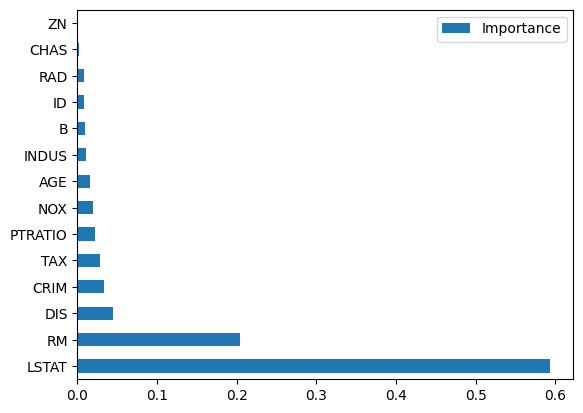

In [16]:
importance.plot(kind='barh')

In [17]:
importance['Importance']

LSTAT      0.593109
RM         0.204453
DIS        0.045089
CRIM       0.033336
TAX        0.027660
PTRATIO    0.021405
NOX        0.019663
AGE        0.016223
INDUS      0.010402
B          0.009856
ID         0.008661
RAD        0.007920
CHAS       0.001361
ZN         0.000863
Name: Importance, dtype: float64

In [18]:
to_keep = importance[importance['Importance'] > 0.001].index
df_raw_train_keep = df_raw_train[to_keep].copy()
df_raw_test_keep = df_raw_test[to_keep].copy()

In [19]:
X_train,X_valid = split_vals(df_raw_train_keep,n_train)

In [20]:
m = RandomForestRegressor(n_jobs=-1,oob_score=True)
m.fit(X_train,y_train)
print_score(m)

[1.3617348376148186, 3.1314466369395446, 0.9776769310839113, 0.8440764269834738, 0.8437428434683489]


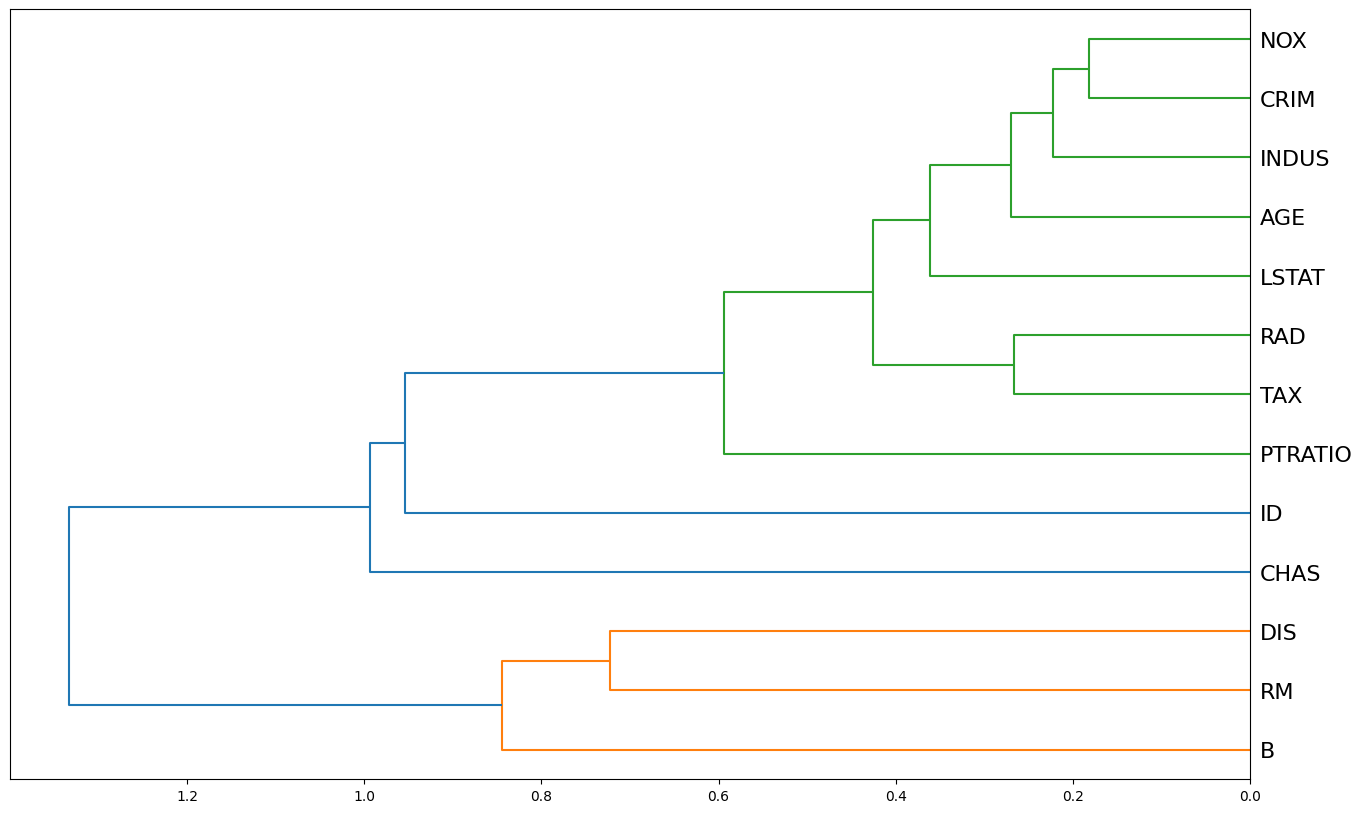

In [21]:
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(df_raw_train_keep).correlation,4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed,method='average')
fig = plt.figure(figsize=(16,10))
dendogram = hc.dendrogram(z,labels=df_raw_train_keep.columns,orientation='left',leaf_font_size=16)
plt.show()

In [23]:
def feat_importance(m,df_raw_train_keep):
    importance = m.feature_importances_
    importance = pd.DataFrame(importance,index=df_train.columns,columns=["Importance"])
    return importance.sort_values(by=['Importance'],ascending=False)

In [24]:

importance[:]

,Importance
LSTAT,0.593109
RM,0.204453
DIS,0.045089
CRIM,0.033336
TAX,0.027660
PTRATIO,0.021405
NOX,0.019663
AGE,0.016223
INDUS,0.010402
B,0.009856


<Axes: >

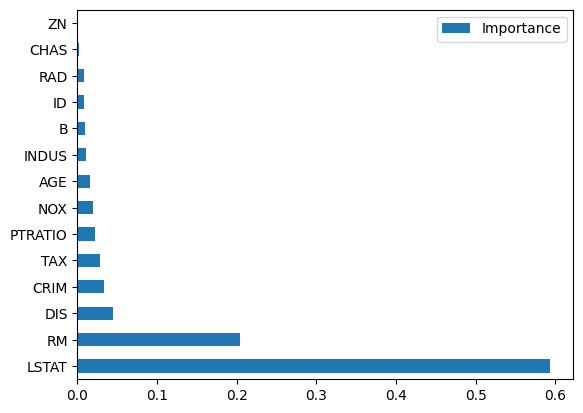

In [25]:
importance.plot(kind='barh')

In [26]:
feats = ['LSTAT','RM','DIS','NOX','PTRATIO','CRIM','AGE']
m = RandomForestRegressor(n_jobs=-1,oob_score=True)
m.fit(X_train,y_train)
print_score(m)

[1.3525609442251163, 3.032482390715566, 0.977976695214255, 0.8537761134940204, 0.8316383636576322]


In [31]:
for f in feats:
    df_subs = df_raw_train_keep.drop(f,axis=1)
    X_train,X_valid =split_vals(df_subs,n_train)
    m = RandomForestRegressor(n_jobs=-1,oob_score=True)
    m.fit(X_train,y_train)
    print(f)
    print_score(m)

LSTAT
[1.778152224454737, 3.393262166411548, 0.9619366789326123, 0.8169133925279376, 0.7003144075037019]
RM
[1.4575517177115607, 3.7794488553226917, 0.974424934734526, 0.7728678075690709, 0.8100078172598819]
DIS
[1.3690501060262394, 3.2292939228258533, 0.9774364468723649, 0.8341800048198815, 0.834351255009796]
NOX
[1.3725374657076737, 3.3337855254950015, 0.9773213489012055, 0.8232753782045328, 0.8336597000450691]
PTRATIO
[1.3380445455523353, 3.095198082514266, 0.9784468898979647, 0.8476653696937342, 0.8327418195474614]
CRIM
[1.3076218235152448, 3.0323882337194217, 0.9794158411977808, 0.8537851937038283, 0.8417073177228739]
AGE
[1.386553697792749, 3.1073370029657217, 0.9768557991125412, 0.8464681577450843, 0.8405450527004568]


In [32]:
n_estimators = [int(x) for x in np.arange(start = 10, stop = 2000, step = 10)]
max_features = [0.5,'auto', 'sqrt','log2']
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [33]:
# First create the base model to tune
m = RandomForestRegressor()
# Fit the random search model
m_random = RandomizedSearchCV(estimator = m, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
m_random.fit(X_train, y_train)
m_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

{'n_estimators': 40,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'bootstrap': False}

In [34]:
m = RandomForestRegressor(n_estimators=640,min_samples_leaf=1,max_features=0.5,n_jobs=-1,bootstrap=True,oob_score = True)
m.fit(X_train,y_train)
print_score(m)

[1.2805801579016352, 2.9753001230164173, 0.9802584003627218, 0.8592386873827824, 0.8578735058713118]


In [35]:
df_sub = df_raw_train_keep.drop(['PTRATIO'],axis=1)
X_train,X_valid = split_vals(df_sub,n_train)
m = RandomForestRegressor(n_estimators=640,min_samples_leaf=1,max_features=0.5,n_jobs=-1,oob_score = True)
m.fit(X_train,y_train)
print_score(m)

[1.2878233045247236, 2.9591928839076975, 0.9800344461032349, 0.8607586274925385, 0.8495962645593597]


In [36]:
#X_test = df_raw_test_keep
X_test = df_raw_test_keep.drop(['PTRATIO'],axis=1)
prediction = m.predict(X_test)

[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=1, n_estimators=340; total time=   0.3s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=2, n_estimators=1100; total time=   1.1s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=2, n_estimators=1420; total time=   1.0s
[CV] END bootstrap=False, max_features=log2, min_samples_leaf=4, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, n_estimators=1830; total time=   1.6s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, n_estimators=1420; total time=   1.2s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=820; total time=   1.2s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, n_estimators=1300; total time=   1.1s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, n_estimators=160; total time=   0.1s
[CV] END bootstrap=False, max_features=log2, min_samples_leaf=4, n_estimators=20; t

In [34]:
solution = pd.DataFrame({"ID": df_raw_test.ID, 'MEDV': prediction})
solution.to_csv('house_preds.csv', index=False)

In [72]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Construct the file path
file_path = os.path.join(current_directory, 'house_preds.csv')

[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=4, n_estimators=1580; total time=   1.5s
[CV] END bootstrap=True, max_features=log2, min_samples_leaf=2, n_estimators=1250; total time=   1.0s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, n_estimators=1830; total time=   1.4s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=4, n_estimators=980; total time=   0.7s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=4, n_estimators=1860; total time=   1.5s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, n_estimators=1300; total time=   1.2s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=4, n_estimators=1860; total time=   1.5s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=4, n_estimators=270; tot